2023-05-26 21:45:16.122382: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                         TX_ANT_CORRELATION: 0.1 & RX_ANT_CORRELATION: 0.1                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       -15.0|  6.832e-01|  4.524e-01|           59303|     6.052e-01|     4.021e-01|              52701|   6.089e-01|   4.048e-01|          

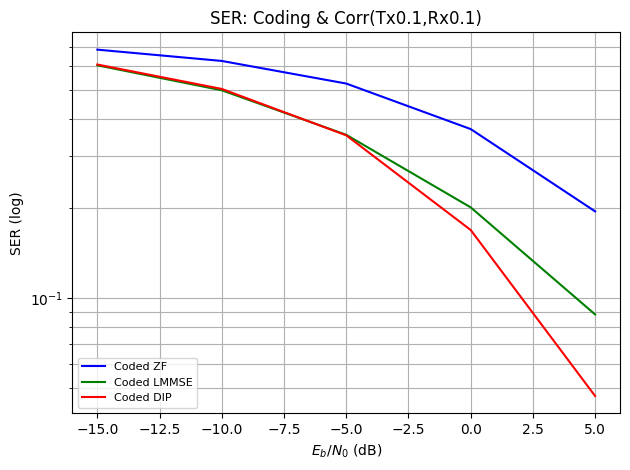

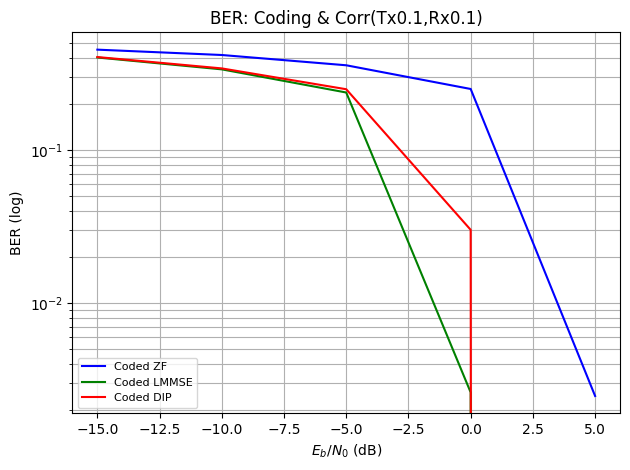

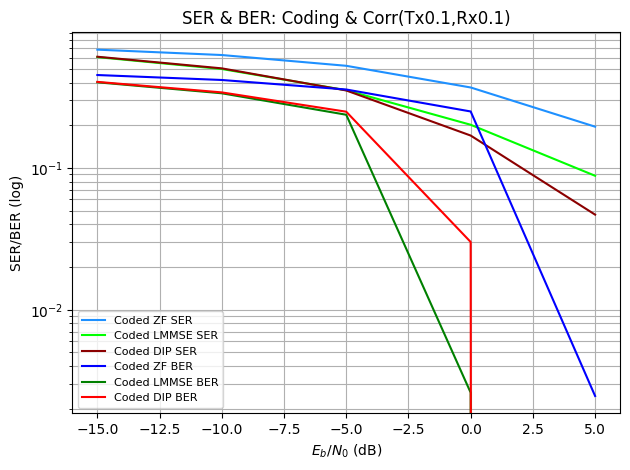

Loading BokehJS ...

|                                                         TX_ANT_CORRELATION: 0.1 & RX_ANT_CORRELATION: 0.5                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       -15.0|  6.954e-01|  4.622e-01|           60579|     6.092e-01|     4.046e-01|              53038|   6.118e-01|   4.073e-01|            53390|      1.708e+03|
|---

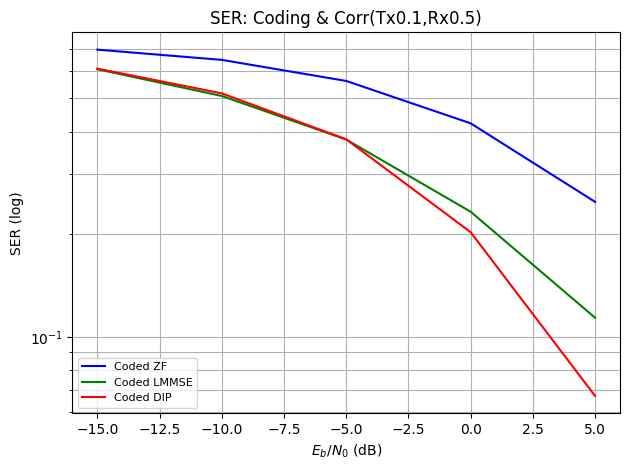

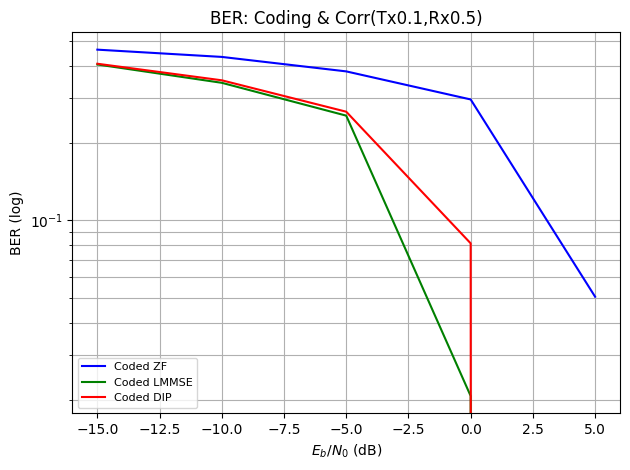

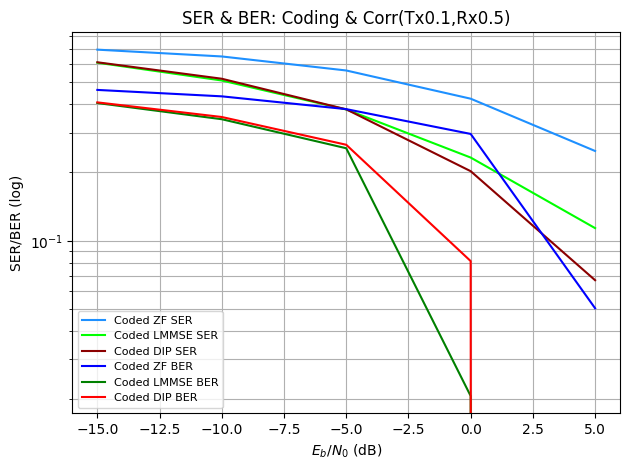

Loading BokehJS ...

|                                                         TX_ANT_CORRELATION: 0.1 & RX_ANT_CORRELATION: 0.9                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       -15.0|  7.264e-01|  4.830e-01|           63314|     6.232e-01|     4.143e-01|              54309|   6.303e-01|   4.187e-01|            54885|      1.588e+03|
|---

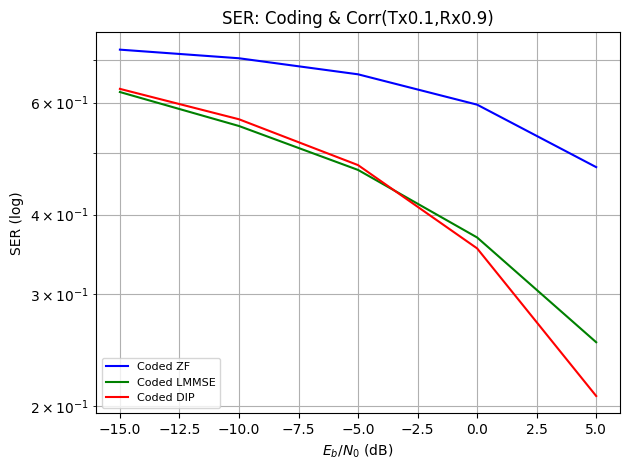

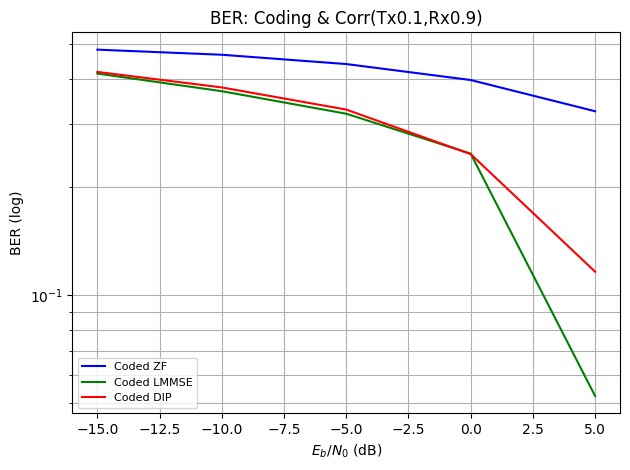

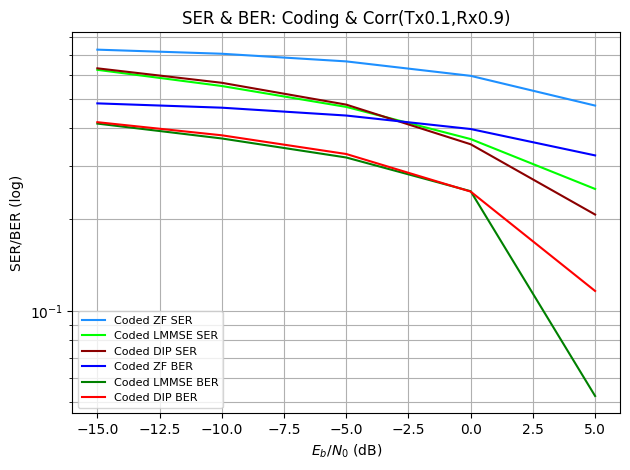

Loading BokehJS ...

|                                                         TX_ANT_CORRELATION: 0.5 & RX_ANT_CORRELATION: 0.1                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       -15.0|  6.968e-01|  4.613e-01|           60466|     6.039e-01|     4.032e-01|              52851|   6.089e-01|   4.078e-01|            53456|      1.350e+03|
|---

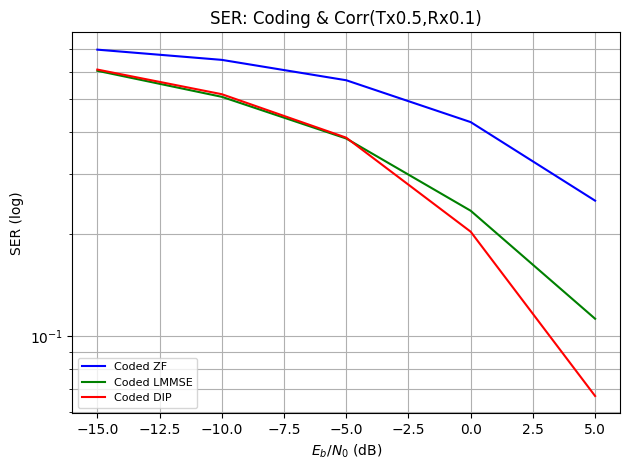

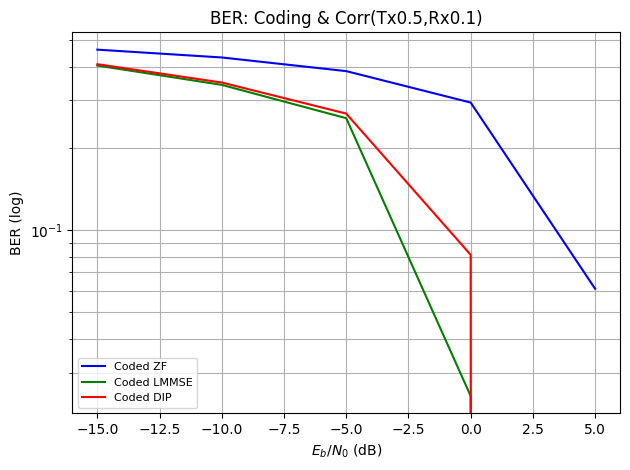

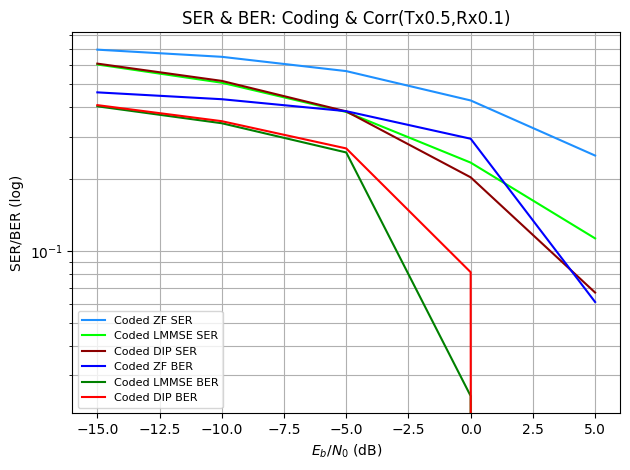

Loading BokehJS ...

|                                                         TX_ANT_CORRELATION: 0.5 & RX_ANT_CORRELATION: 0.5                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       -15.0|  7.034e-01|  4.636e-01|           60768|     6.107e-01|     4.042e-01|              52975|   6.149e-01|   4.066e-01|            53294|      1.284e+03|
|---

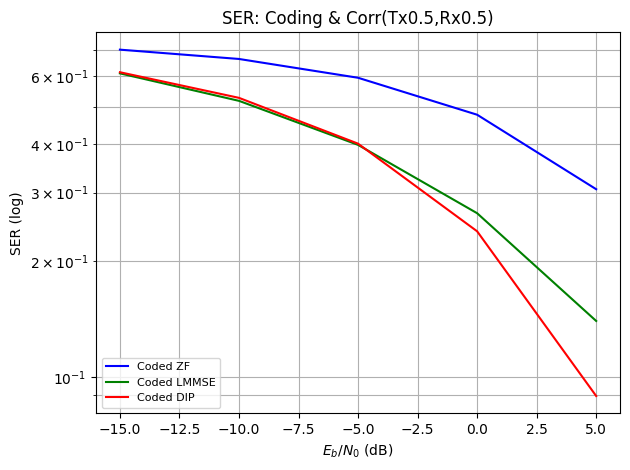

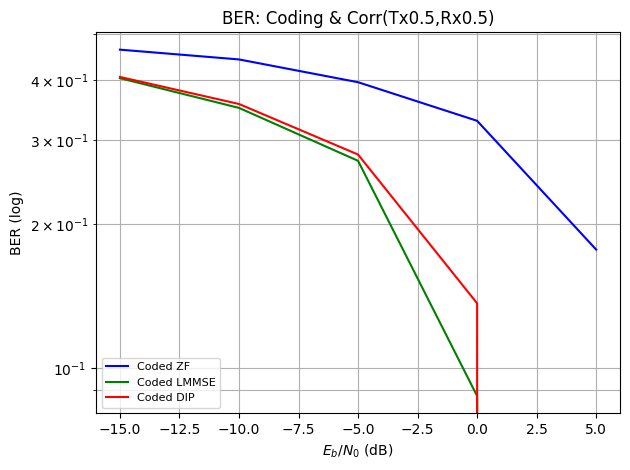

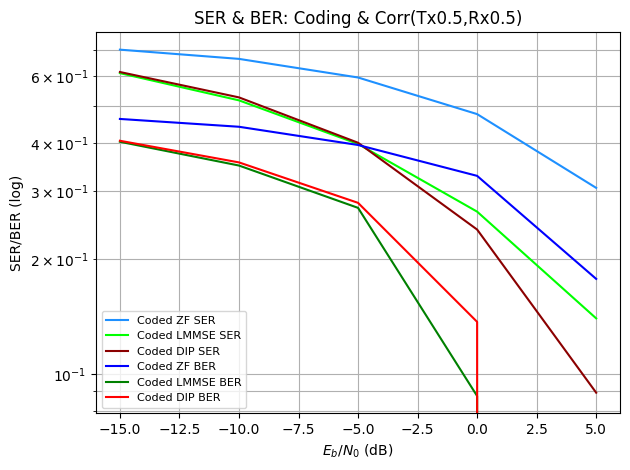

Loading BokehJS ...

|                                                         TX_ANT_CORRELATION: 0.5 & RX_ANT_CORRELATION: 0.9                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       -15.0|  7.304e-01|  4.866e-01|           63784|     6.241e-01|     4.140e-01|              54265|   6.337e-01|   4.217e-01|            55275|      1.326e+03|
|---

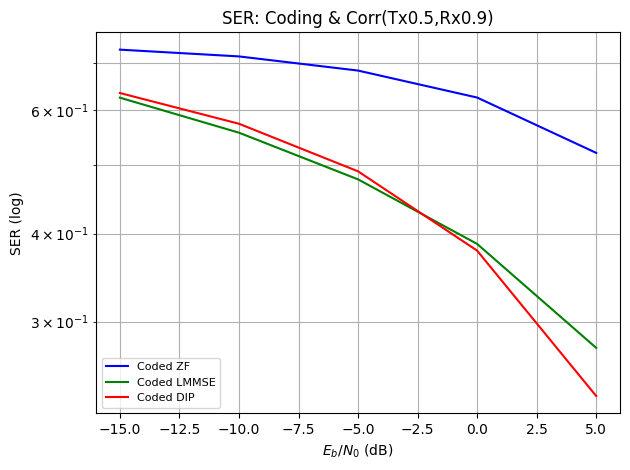

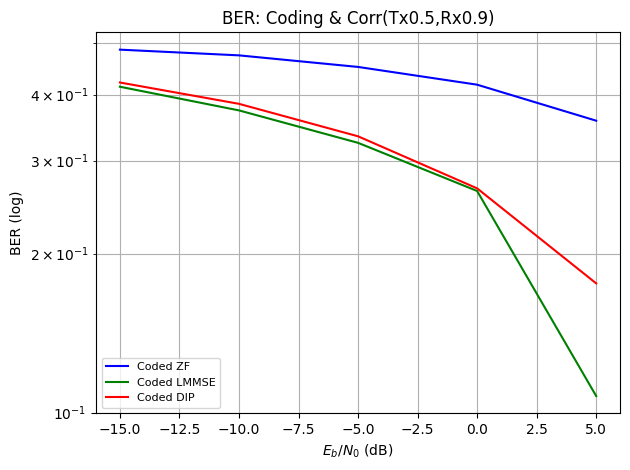

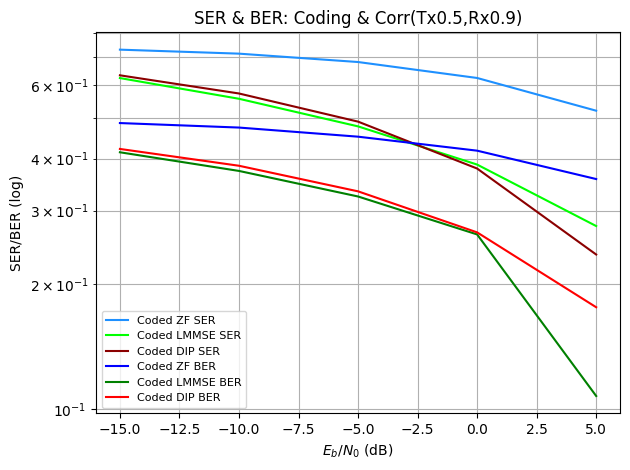

IndexError: index 5 is out of bounds for axis 0 with size 5

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from YCodeYCorr import ycodeycorr

### Simulation
Block_Length = 256              # Block Length (k)
NUM_BITS_PER_SYMBOL = 2         # Mapping: 4QAM
CONSTELLATION_TYPE = "qam"      # Constellation/Modulation Type
DEMAPPING_METHOD = "app"        # Demapping Method: "app"
NUM_TX_ANT = 8                  # Transmit Antennas
NUM_RX_ANT = 8                  # Receive Antennas
CODERATE = 0.5                  # Code Rate
CORRELATION_INDEX_MIN = 0.1     # Minimum Spatial Correlation
CORRELATION_INDEX_MAX = 0.9     # Maximum Spatial Correlation
CORRELATION_INDEX_POINTS = 3    # Correlation Points between Max and Min

NUM_DATA_GROUP = 1              # Number of Data Group
BATCH_SIZE = 128                # Number of Parallelly Processed Batches
EBN0_DB_MIN = -15.0               # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 5.0              # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 5             # EBNO Points

model_ycodeycorr = ycodeycorr(Block_Length, 
                                NUM_BITS_PER_SYMBOL,
                                CONSTELLATION_TYPE,
                                DEMAPPING_METHOD,
                                NUM_RX_ANT,
                                NUM_TX_ANT,
                                CODERATE,
                                CORRELATION_INDEX_MIN,
                                CORRELATION_INDEX_MAX,
                                CORRELATION_INDEX_POINTS)

model_ycodeycorr(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)